# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [257]:
### Loading necessary library for the model

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import metrics

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [195]:
Cubic = pd.read_csv(r'C:\Users\vicky\Document\cubic_zirconia.csv')

In [196]:
Cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [346]:
Cubic.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [347]:
# Checking the shape of the data 
Cubic.shape

(26967, 11)

In [263]:
# Checking the info of the data
Cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


We have float, int and object data types in the data

In [264]:
# Check the data description 
Cubic.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


We have both categorical and continuous data,

For categorical data we have cut, colour and clarity

For continuous data we have cart, depth, x, y, z, table and price

Price will be target variable.

In [265]:
# Percentage of missing values
100 * Cubic.isnull().sum() / len(Cubic)

Unnamed: 0    0.00000
carat         0.00000
cut           0.00000
color         0.00000
clarity       0.00000
depth         2.58464
table         0.00000
x             0.00000
y             0.00000
z             0.00000
price         0.00000
dtype: float64

In [266]:
# Checking the null value
Cubic.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [267]:
# Checking the duplicates value in the data
dups = Cubic.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [60]:
# Checking the unique values in the categorical data
for column in Cubic.columns:
    if Cubic[column].dtype == 'object':
        print(column.upper(),': ',Cubic[column].nunique())
        print(Cubic[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




# Univariate Analysis

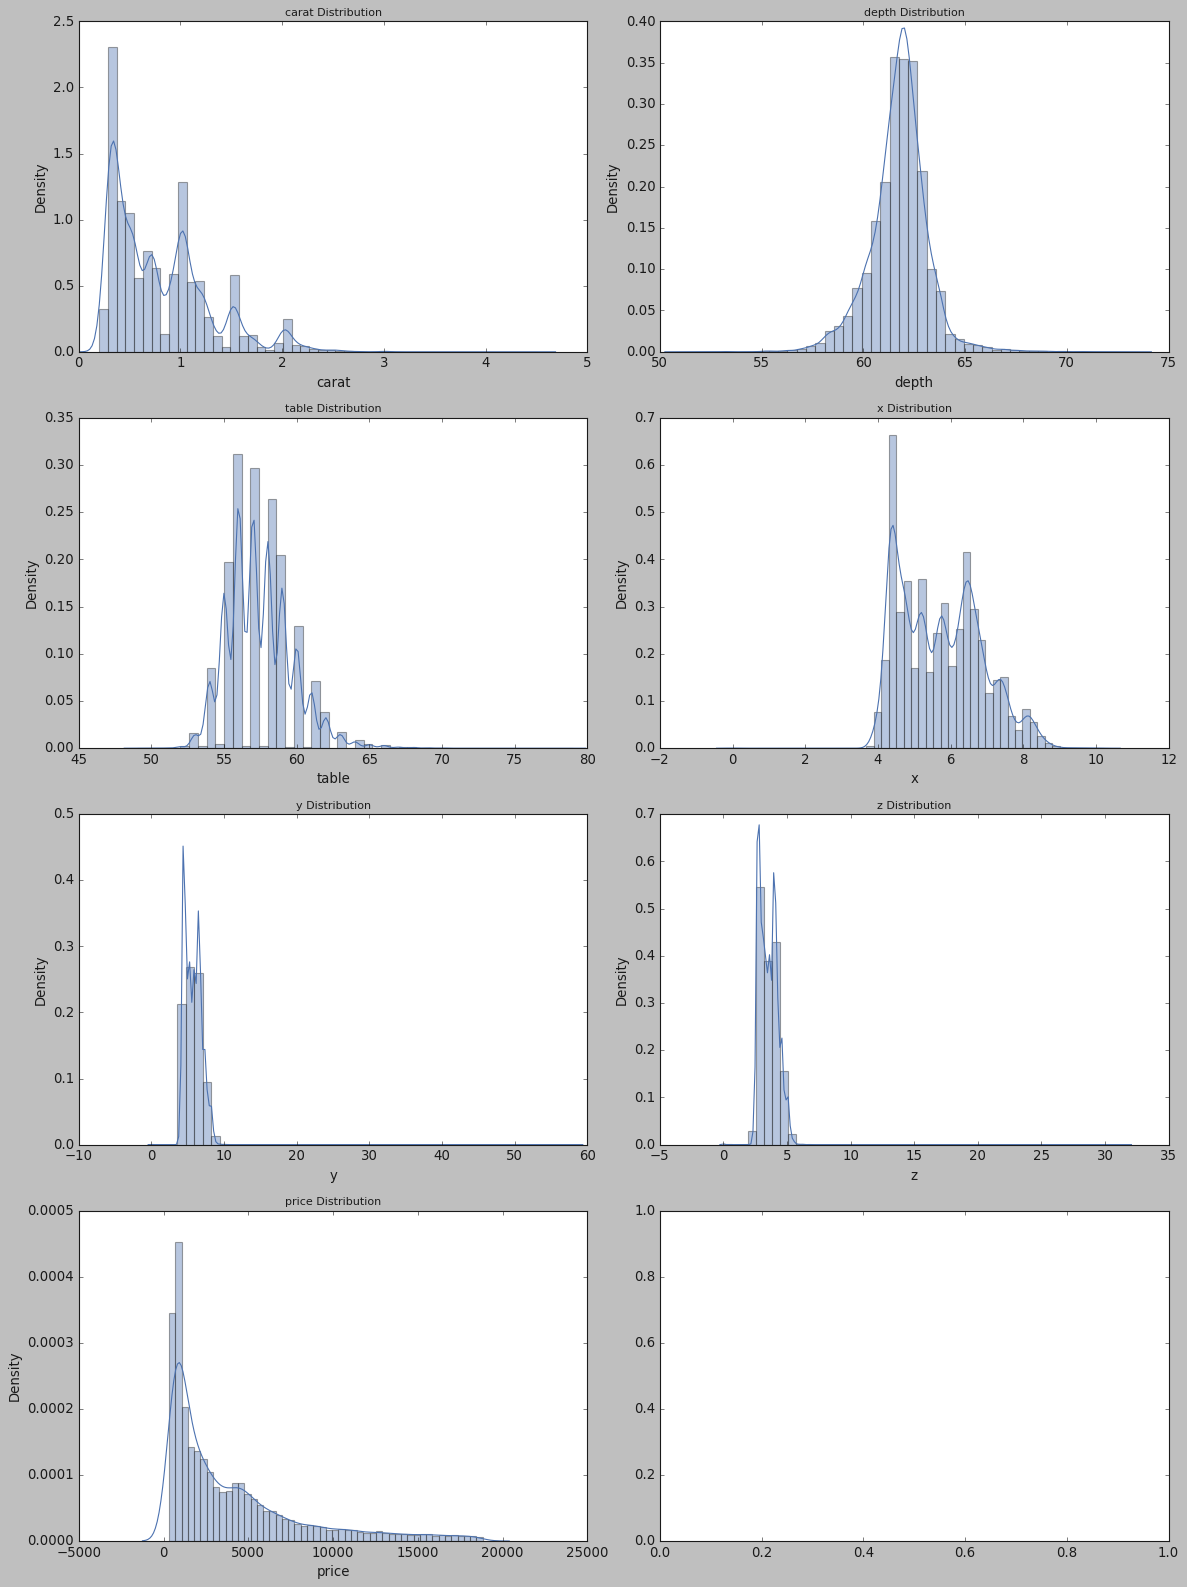

In [352]:
# Distplot to check Distribution and Density of each Variables
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.distplot(Cubic['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)

a = sns.distplot(Cubic['depth'] , ax=axes[0][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(Cubic['table'] , ax=axes[1][0])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(Cubic['x'] , ax=axes[1][1])
a.set_title("x Distribution",fontsize=10)

a = sns.distplot(Cubic['y'] , ax=axes[2][0])
a.set_title("y Distribution",fontsize=10)

a = sns.distplot(Cubic['z'] , ax=axes[2][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(Cubic['price'] , ax=axes[3][0])
a.set_title("price Distribution",fontsize=10)
plt.tight_layout()
plt.show()

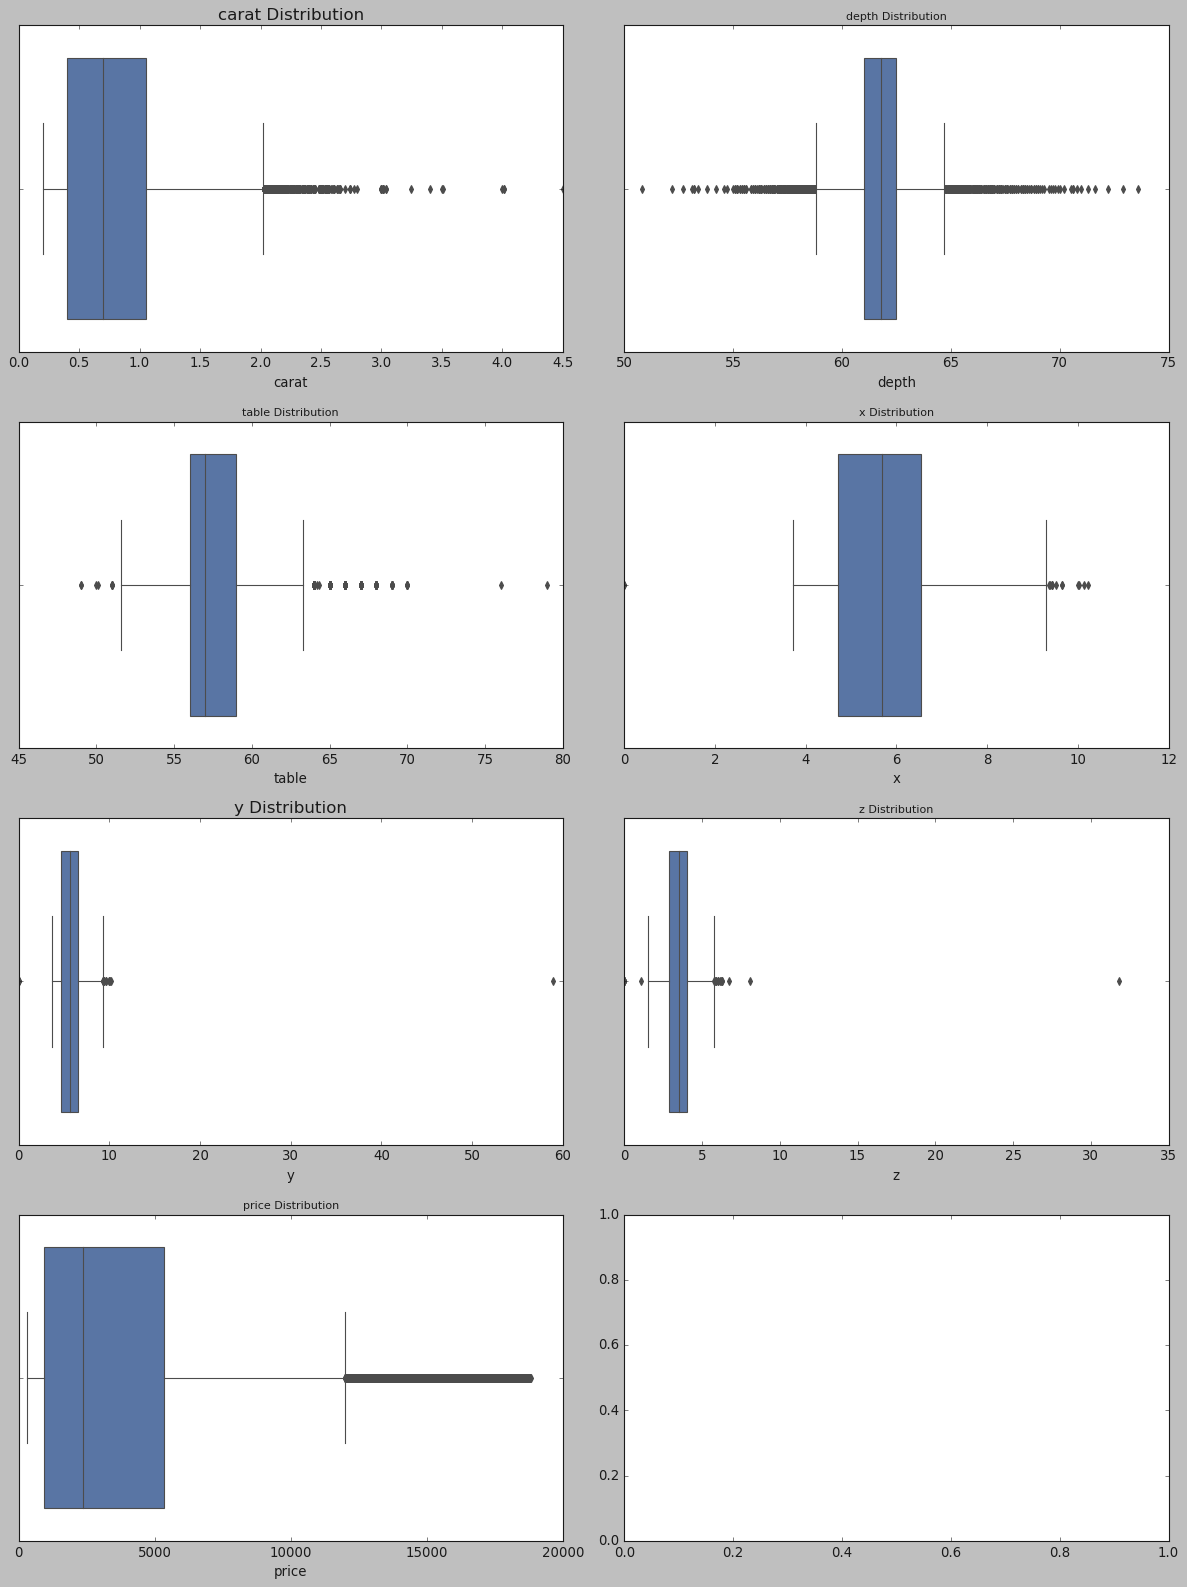

In [353]:
# Boxplot for checking presence of outliers in each feature or Univariate Analysis of all variables
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 20)
a = sns.boxplot(Cubic['carat'] , orient = "v" , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=15)

a = sns.boxplot(Cubic['depth'] , orient = "v" , ax=axes[0][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(Cubic['table'] , orient = "v" , ax=axes[1][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(Cubic['x'] , orient = "v" , ax=axes[1][1])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(Cubic['y'] , orient = "v" , ax=axes[2][0])
a.set_title("y Distribution",fontsize=15)

a = sns.boxplot(Cubic['z'] , orient = "v" , ax=axes[2][1])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(Cubic['price'] , orient = "v" , ax=axes[3][0])
a.set_title("price Distribution",fontsize=10)
plt.tight_layout()
plt.show()

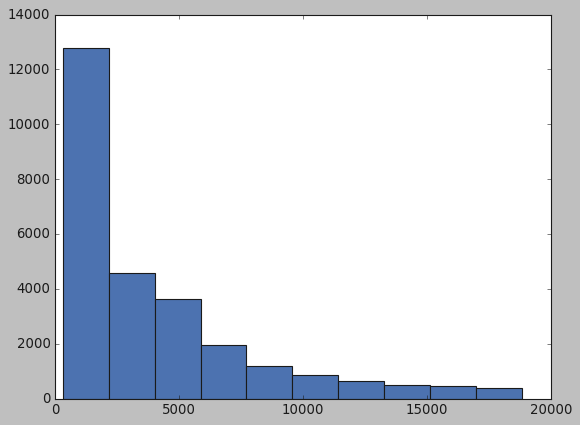

In [354]:
# Check the PRICE-HIST
plt.hist(Cubic.price)
plt.show()

In [64]:
# Checking the columns of the data
Cubic.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [65]:
# Checking the Skew in the data
Cubic.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

# Bivariate Analysis

CUT:

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

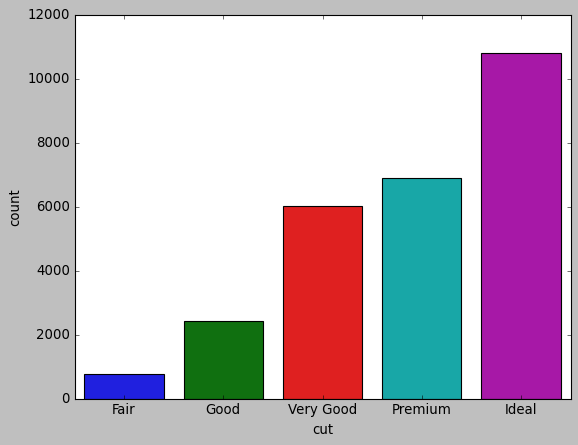

In [66]:
# Quality is increasing order Fair, Good, Very Good, Premium, Ideal
sns.countplot(Cubic['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The most preferred cut seems to be ideal cut for diamonds.

<AxesSubplot:xlabel='cut', ylabel='price'>

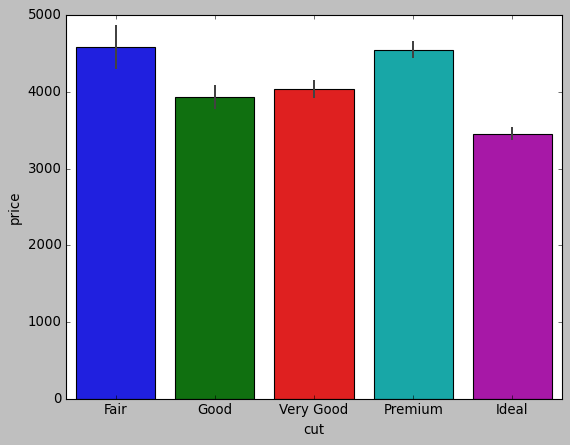

In [67]:
sns.barplot(data = Cubic, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The reason for the most preferred cut ideal is because those diamonds are prices lower than other cuts.

COLOR:

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

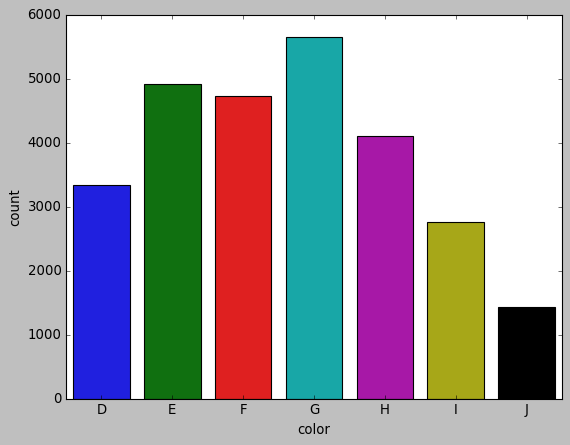

In [68]:
# D being the best and J the worst.
sns.countplot(Cubic['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

We have 7 colours in the data, The G seems to be the preferred colour,

<AxesSubplot:xlabel='color', ylabel='price'>

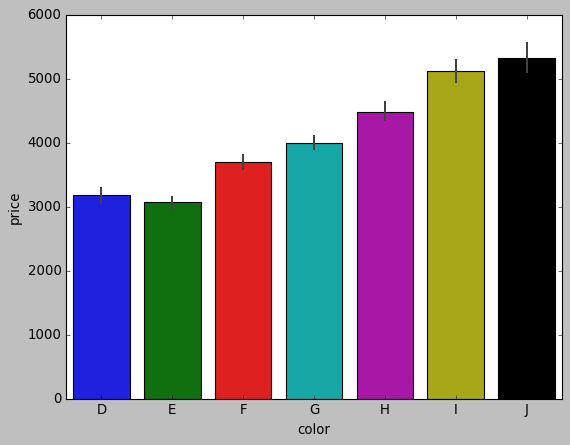

In [70]:
sns.barplot(data = Cubic, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

We see the G is priced in the middle of the seven colours, whereas J being the worst colour price seems too high.

CLARITY:

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

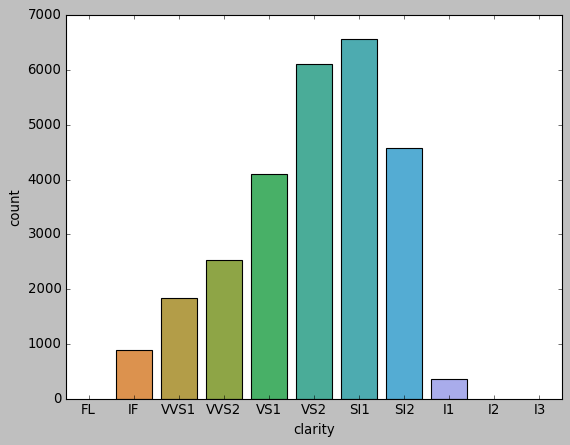

In [71]:
sns.countplot(Cubic['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

The clarity VS2 seems to be preferred by people

<AxesSubplot:xlabel='clarity', ylabel='price'>

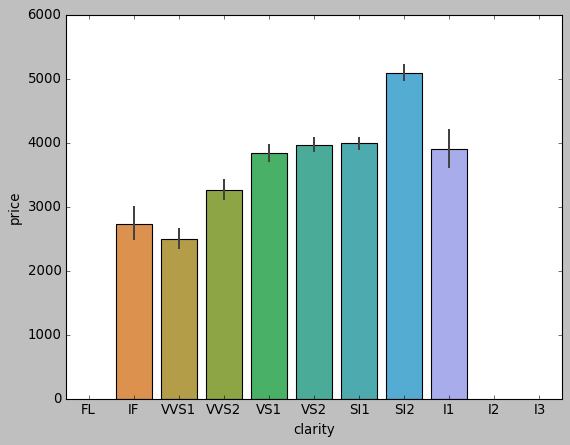

In [73]:
sns.barplot(data = Cubic, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

The data has No FL diamonds, from this we can clearly understand the flawless diamonds are not bringing any profits to the store.

More relationship between categorical variables

In [77]:
# Cut and Colour

<AxesSubplot:xlabel='cut'>

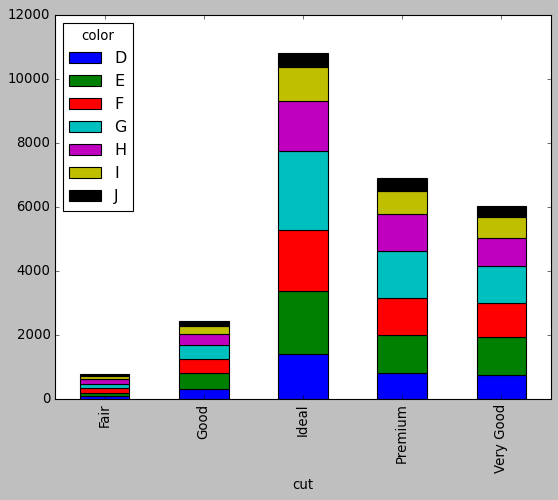

In [74]:
pd.crosstab(Cubic['cut'], Cubic['color']).plot(kind = 'bar', stacked = True)

In [75]:
# Cut and Clarity

<AxesSubplot:xlabel='cut'>

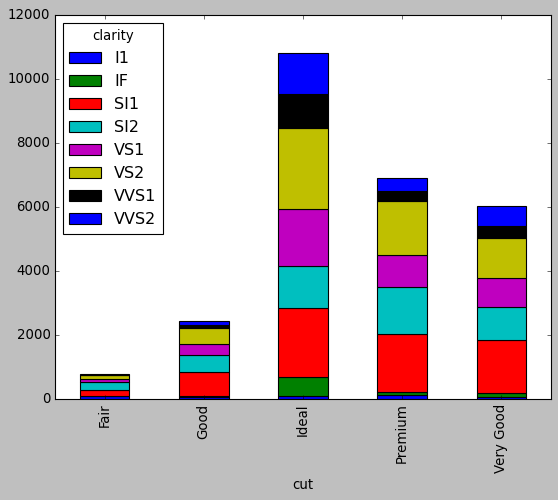

In [76]:
pd.crosstab(Cubic['cut'], Cubic['clarity']).plot(kind = 'bar', stacked = True)

CORRELATION

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


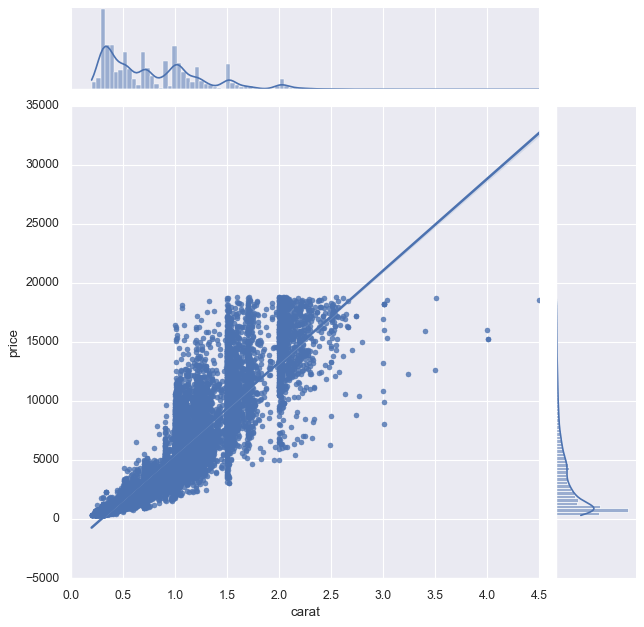

In [80]:
# CARAT VS PRICE
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('carat', 'price', data = Cubic, kind='reg', height=8)
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


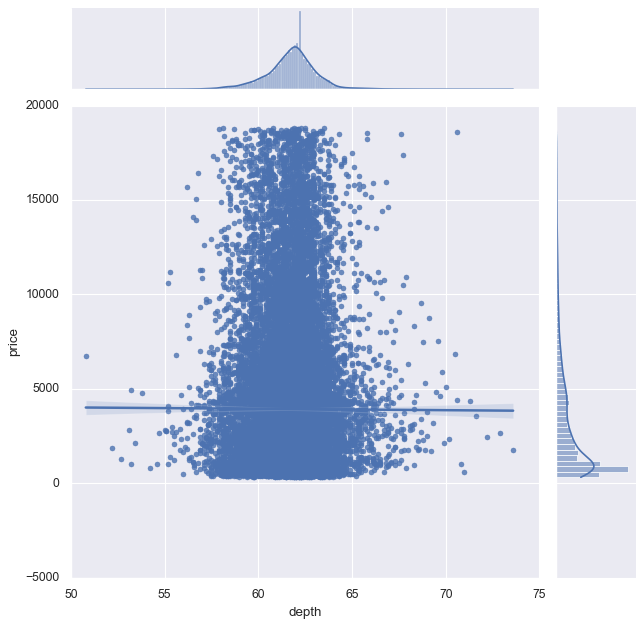

In [81]:
# DEPTH VS PRICE
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('depth', 'price', data = Cubic, kind='reg', height=8)
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


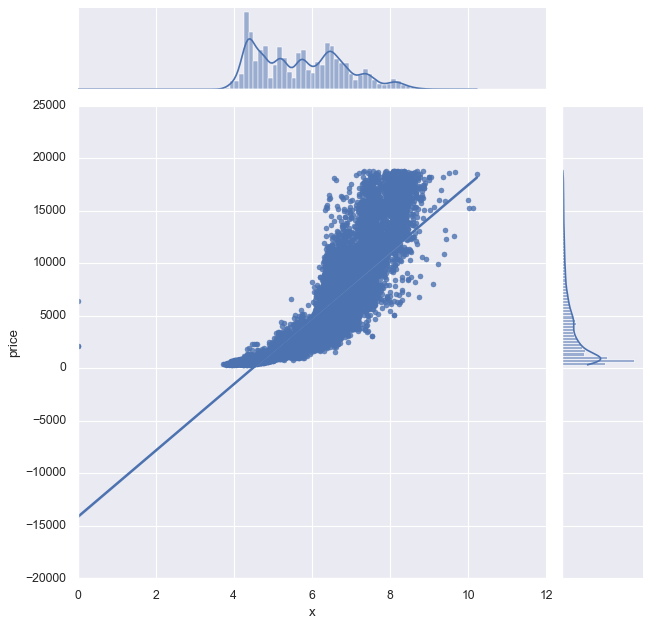

In [82]:
# X VS PRICE
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('x', 'price', data = Cubic, kind='reg', height=8)
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


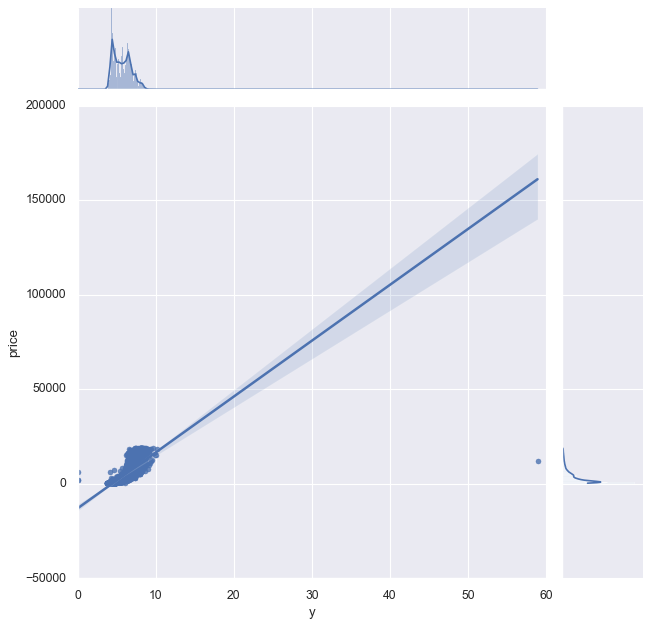

In [83]:
# Y VS PRICE
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('y', 'price', data = Cubic, kind='reg', height=8)
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


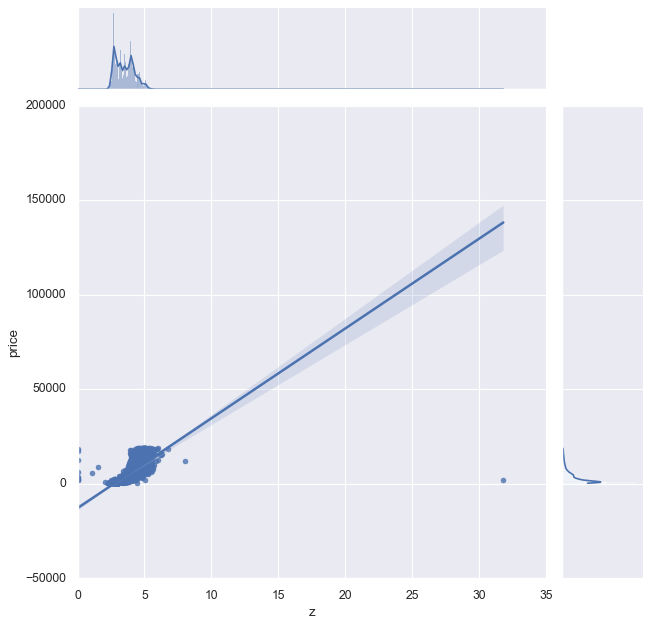

In [84]:
# Z VS PRICE
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('z', 'price', data = Cubic, kind='reg', height=8)
plt.show()

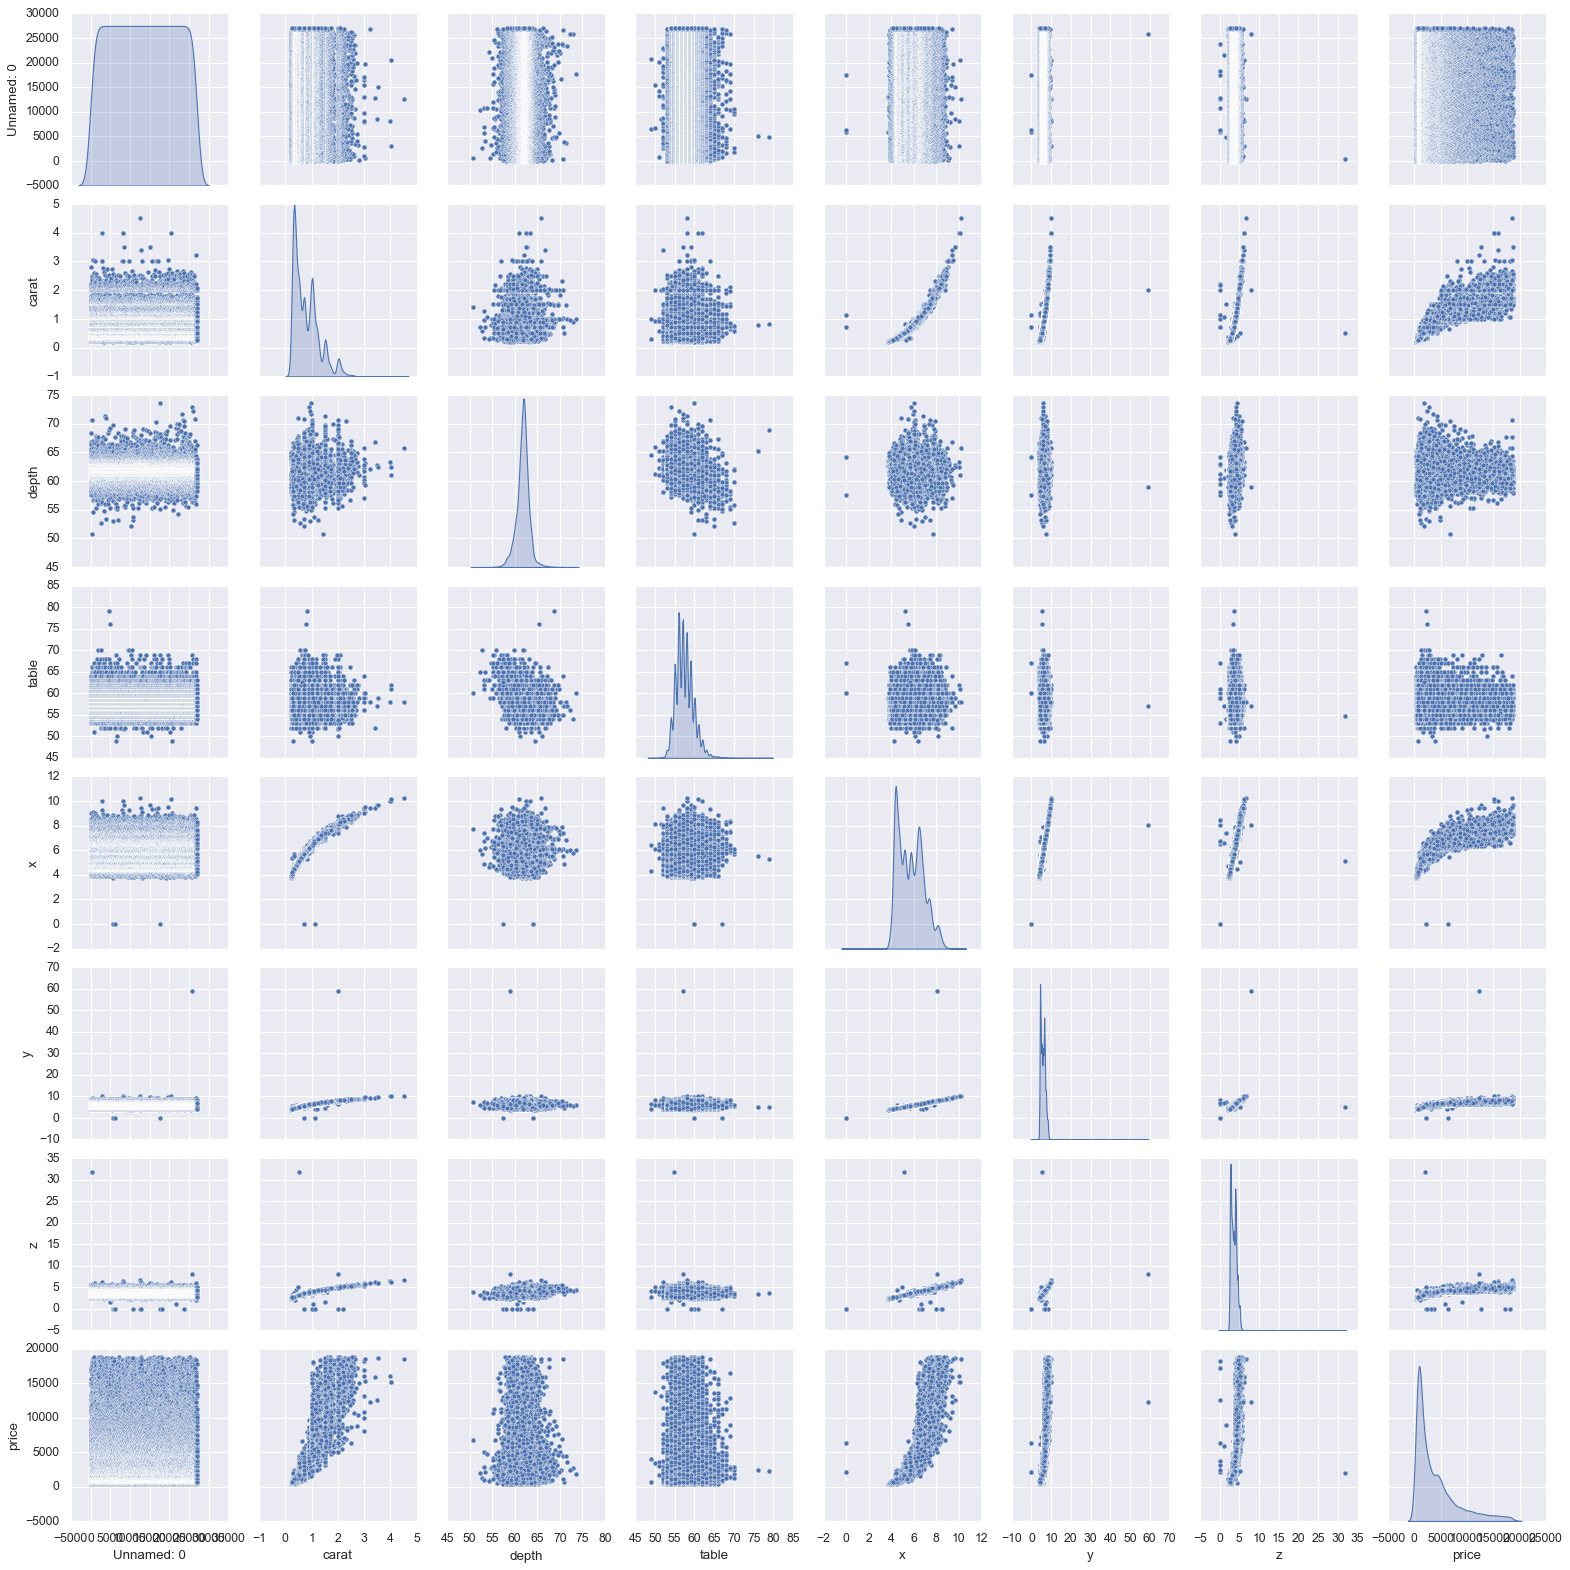

In [85]:
# Checking the data distribution
sns.pairplot(Cubic, diag_kind='kde')  
plt.show()

CORRELATION MATRIX

<AxesSubplot:>

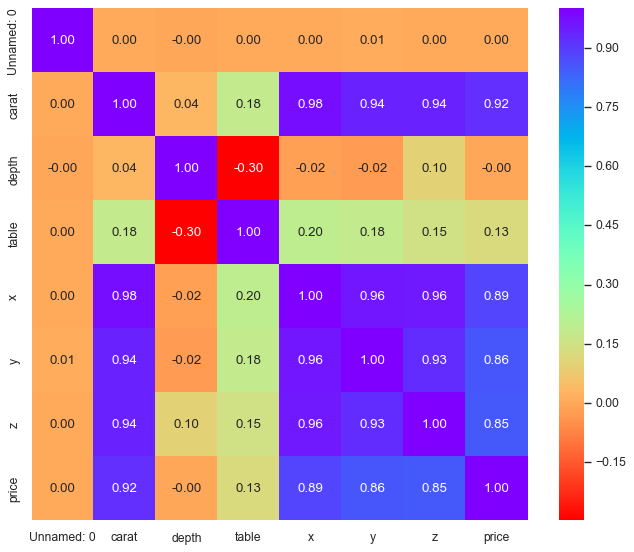

In [90]:
Cubic_cor = Cubic.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Cubic_cor, annot=True, fmt = '.2f', cmap='rainbow_r')

This matrix clearly shows the presence of multi collinearity in the dataset

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [268]:
Cubic.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

Yes we have Null values in depth, since depth being continous variable mean or median imputation can be done.

The percentage of Null values is less than 5%, we can also drop these if we want.

In [269]:
# After median imputation, we don't have any null values in the dataset.
for column in Cubic.columns:
    if Cubic[column].dtype != 'object':
        median = Cubic[column].median()
        Cubic[column] = Cubic[column].fillna(median)    
        
Cubic.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [270]:
# Checking the data types
Cubic.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [271]:
# Checking if there is value that is ''0''
Cubic.loc[((Cubic['x'] == 0) | (Cubic['y'] == 0) | (Cubic['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


We have certain rows having values zero, the x, y, z are the dimension of a diamond so this can't take into model. As there are very less rows.

Wcan drop these rows as don't have any meaning in model building.

SCALING

In [272]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num = Cubic.select_dtypes(exclude=['object'])

# update the cols with their normalized values
Cubic[num.columns] = sc.fit_transform(num)

In [273]:
Cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731987,-1.043201,Ideal,E,SI1,0.253453,0.243689,-1.293628,-1.238014,-1.218491,-0.854832
1,-1.731858,-0.980405,Premium,G,IF,-0.678792,0.243689,-1.160708,-1.092221,-1.162983,-0.734329
2,-1.731730,0.212721,Very Good,E,VVS2,0.325164,1.139736,0.274832,0.331406,0.335747,0.583753
3,-1.731601,-0.792017,Ideal,F,VS1,-0.105103,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979
4,-1.731473,-1.022269,Ideal,F,VVS1,-0.965637,0.691712,-1.222737,-1.117949,-1.232368,-0.785263


In [274]:
# Checking The Outliers In The Data
Cubic.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

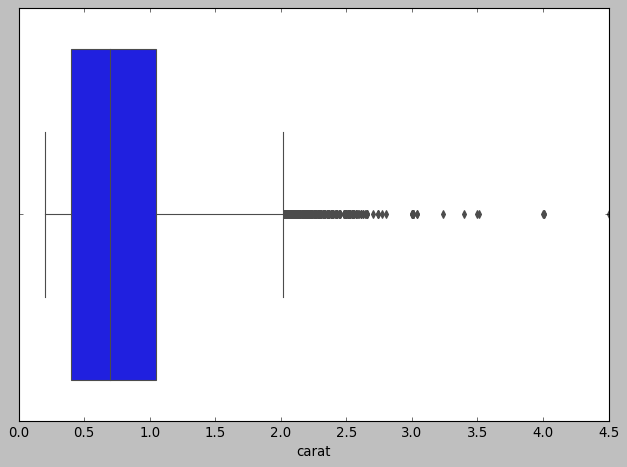

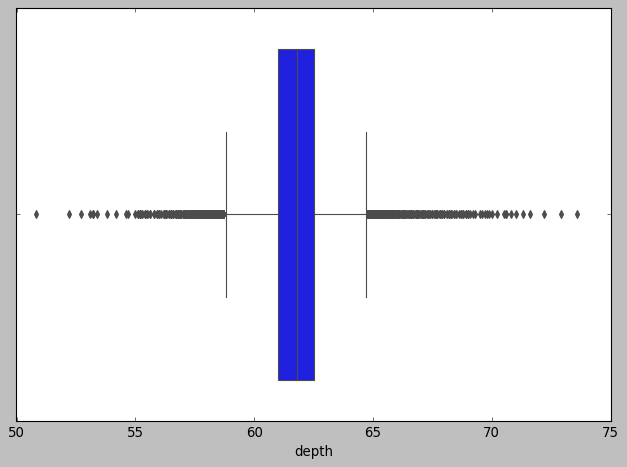

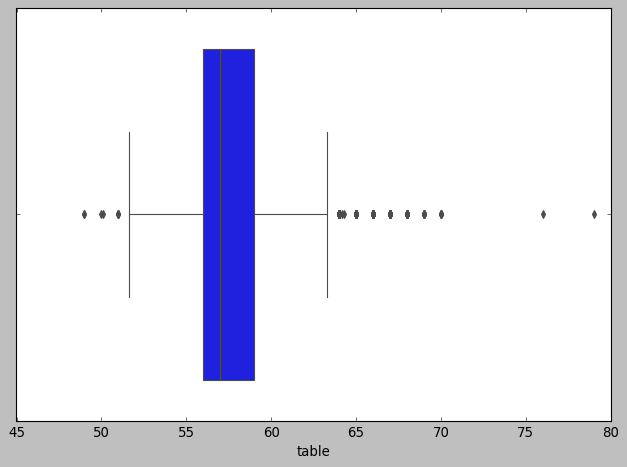

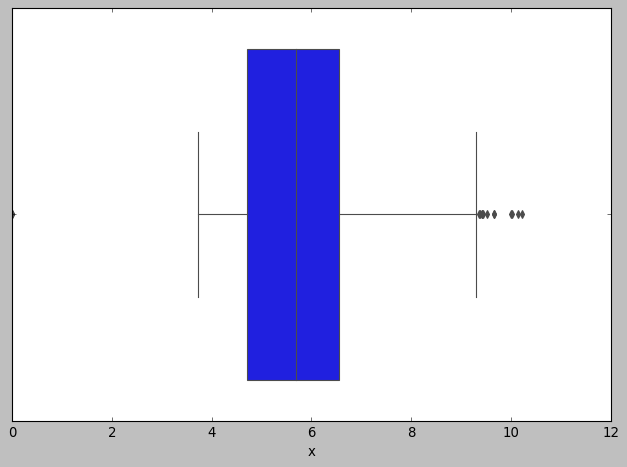

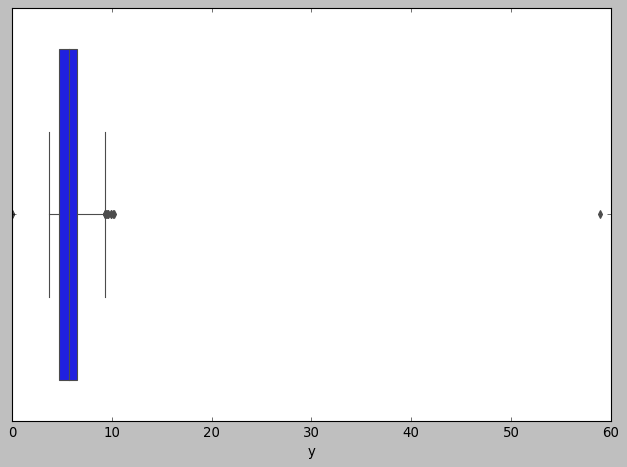

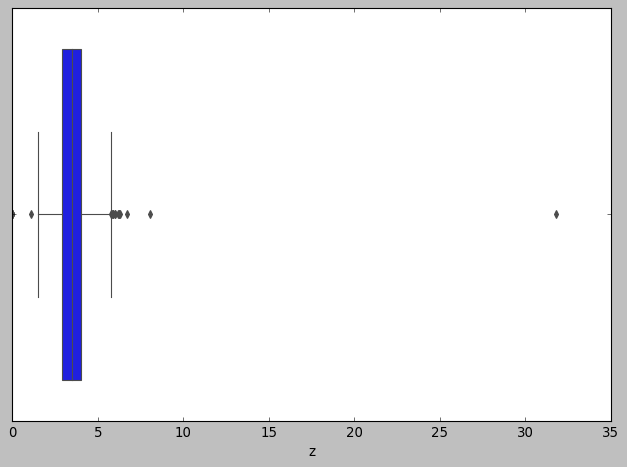

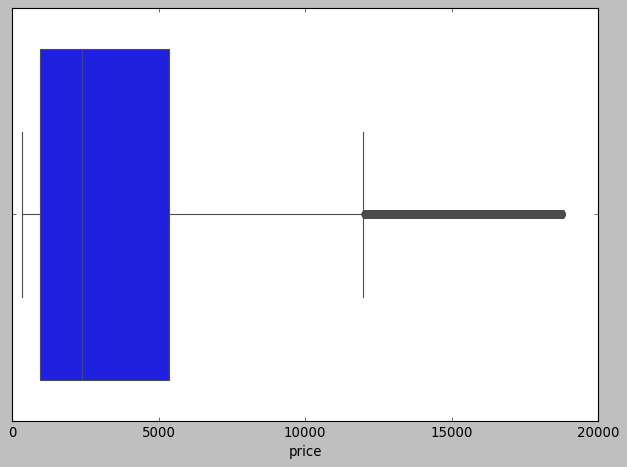

In [199]:
# Before Treating Outliers
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(Cubic[i])
    plt.tight_layout()
    plt.show()

In [276]:
cont=Cubic.dtypes[(Cubic.dtypes!='uint8') & (Cubic.dtypes!='object')].index

In [277]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [278]:
for column in Cubic[cont].columns:
    lr,ur=remove_outlier(Cubic[column])
    Cubic[column]=np.where(Cubic[column]>ur,ur,Cubic[column])
    Cubic[column]=np.where(Cubic[column]<lr,lr,Cubic[column])

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


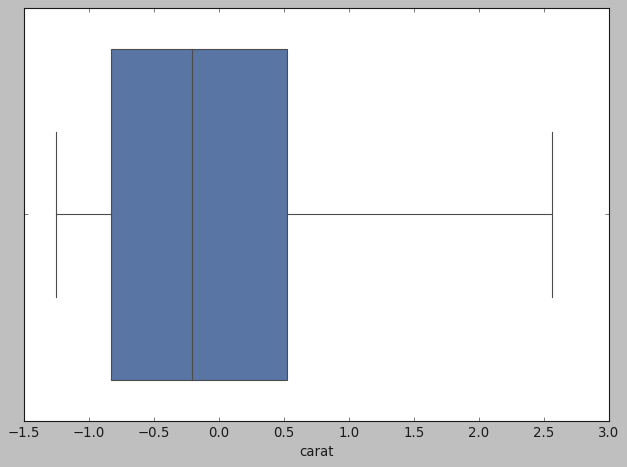

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


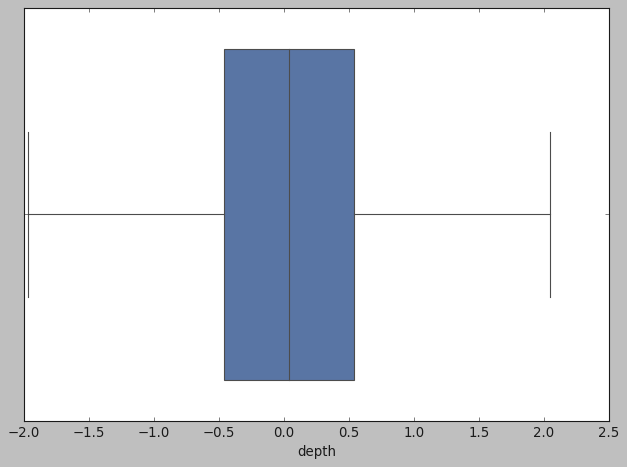

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


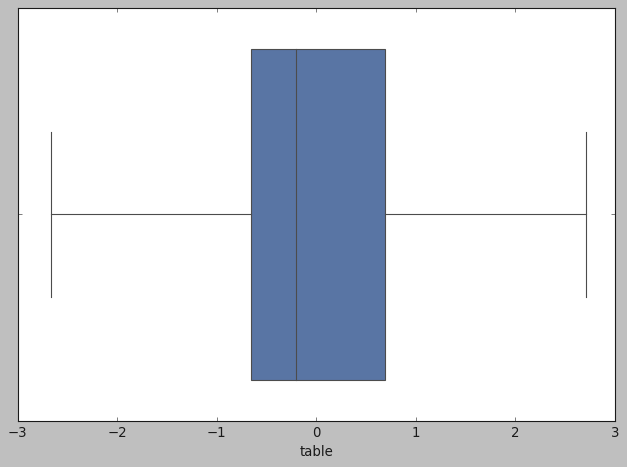

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


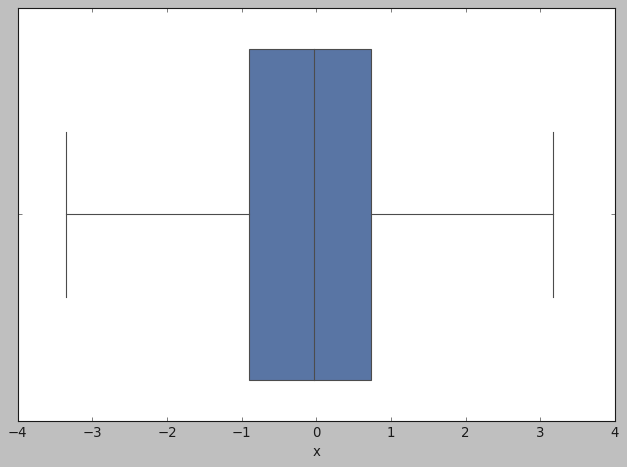

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


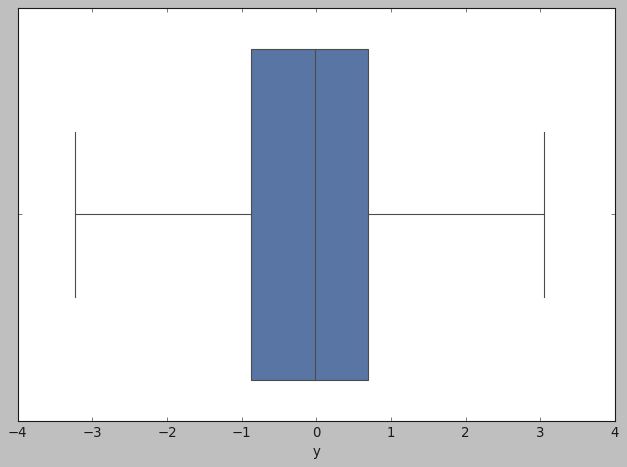

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


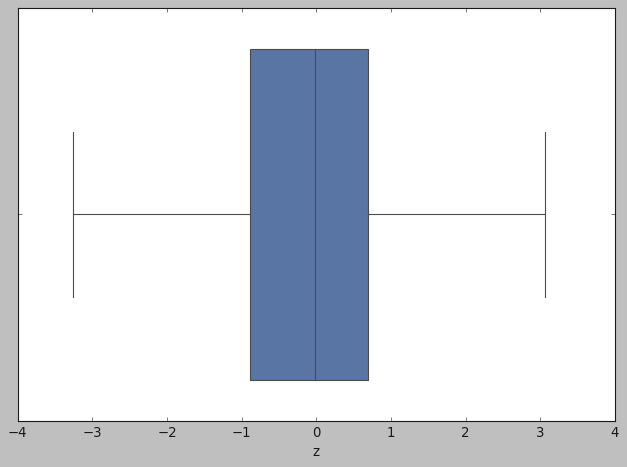

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


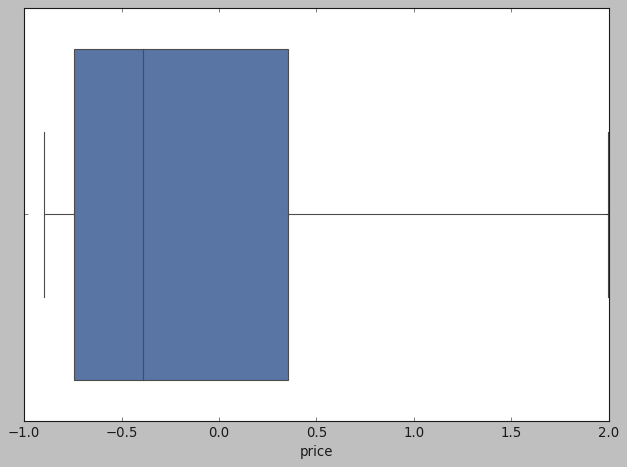

In [279]:
# After Treating Outliers
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(Cubic[i])
    plt.tight_layout()
    plt.show()

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [280]:
# Converting categorical to dummy variables in data

In [281]:
data = pd.get_dummies(Cubic, columns=['cut','color','clarity'],drop_first=True)

In [282]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731987,-1.043201,0.253453,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731858,-0.980405,-0.678792,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731730,0.212721,0.325164,1.139736,0.274832,0.331406,0.335747,0.583753,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731601,-0.792017,-0.105103,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731473,-1.022269,-0.965637,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,0,1,...,0,0,0,0,0,0,0,0,1,0


In [283]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

Dummies have been encoded.

Linear regression model does not take categorical values so that we have encoded categorical values to integer for better results.

DROPING UNWANTED COLUMNS

Train/Test split

In [284]:
# Drop the id column as it is useless for the model.
data_model = data.drop(columns=['Unnamed: 0'], axis=1)

In [285]:
data_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [286]:
data_model.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043201,0.253453,0.243689,-1.293628,-1.238014,-1.218491,-0.854832,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980405,-0.678792,0.243689,-1.160708,-1.092221,-1.162983,-0.734329,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.212721,0.325164,1.139736,0.274832,0.331406,0.335747,0.583753,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.792017,-0.105103,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022269,-0.965637,0.691712,-1.222737,-1.117949,-1.232368,-0.785263,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [287]:
# Copy all the predictor variables into X dataframe
X = data_model.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data_model[['price']]

In [288]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043201,0.253453,0.243689,-1.293628,-1.238014,-1.218491,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980405,-0.678792,0.243689,-1.160708,-1.092221,-1.162983,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.212721,0.325164,1.139736,0.274832,0.331406,0.335747,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.792017,-0.105103,-0.652358,-0.806254,-0.800635,-0.802177,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022269,-0.965637,0.691712,-1.222737,-1.117949,-1.232368,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [289]:
X.shape

(26967, 23)

In [290]:
y.head()

,price
0,-0.854832
1,-0.734329
2,0.583753
3,-0.709979
4,-0.785263


In [291]:
y.shape

(26967, 1)

In [292]:
# Split X and y into training and test set in 70:30 ratio

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

Linear Regression Model

In [294]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [295]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.0867781705759088
The coefficient for depth is -0.00587030922328252
The coefficient for table is -0.012554577495670802
The coefficient for x is -0.36872224876995385
The coefficient for y is 0.2637921769481774
The coefficient for z is -0.019459341870840065
The coefficient for cut_Good is 0.09402845377668038
The coefficient for cut_Ideal is 0.15621064448444688
The coefficient for cut_Premium is 0.1505888713255036
The coefficient for cut_Very Good is 0.12532512064048007
The coefficient for color_E is -0.0484206519863449
The coefficient for color_F is -0.06721616164290556
The coefficient for color_G is -0.10483322720805437
The coefficient for color_H is -0.2097232663869908
The coefficient for color_I is -0.32912499363812014
The coefficient for color_J is -0.47596476533557713
The coefficient for clarity_IF is 1.0079799922829908
The coefficient for clarity_SI1 is 0.6487182138527139
The coefficient for clarity_SI2 is 0.4463040452616143
The coefficient for clarity

In [296]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.7694327062537644


In [297]:
# R square on training data
regression_model.score(X_train, y_train)

0.9408511449976827

In [298]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9403514647503596

In [299]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.21018607103618028

In [300]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2095436929350414

In [301]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [302]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [303]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.782616918961953
depth ---> 2.8323094624438445
table ---> 1.772325834870213
x ---> 437.0790183152251
y ---> 428.27636741905746
z ---> 105.8253713476699
cut_Good ---> 3.589201803602266
cut_Ideal ---> 14.29751693917047
cut_Premium ---> 8.606335512286305
cut_Very Good ---> 7.819005324866198
color_E ---> 2.3688478911466464


We still find we have multi collinearity in the dataset, to drop these values to lower level we can drop columns after doing stats model.

From stats model we can understand the features that do not contribute to the model

We can remove those features after that the VIF values will be reduced

Ideal value of VIF is less then 5%.

In [304]:
# Using Statsmodel library

In [305]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
11687,-0.812949,0.396875,-0.652358,-0.850560,-0.860667,-0.802177,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-0.715197
9728,1.908216,0.755431,-0.204334,1.639481,1.557783,1.681828,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0.591455
1936,-0.980405,0.038319,2.035782,-1.178431,-1.100797,-1.107474,1,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.845639
26220,-0.205920,0.755431,-0.204334,-0.106206,-0.063093,0.002696,0,0,0,1,...,0,0,0,1,0,0,0,0,0,-0.428723
18445,-0.205920,0.253453,-0.652358,-0.053038,-0.020213,-0.011181,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-0.339028


In [306]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [307]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [308]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [309]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.769433
carat            1.086778
depth           -0.005870
table           -0.012555
x               -0.368722
y                0.263792
z               -0.019459
cut_Good         0.094028
cut_Ideal        0.156211
cut_Premium      0.150589
cut_Very_Good    0.125325
color_E         -0.048421
color_F         -0.067216
color_G         -0.104833
color_H         -0.209723
color_I         -0.329125
color_J         -0.475965
clarity_IF       1.007980
clarity_SI1      0.648718
clarity_SI2      0.446304
clarity_VS1      0.850393
clarity_VS2      0.782923
clarity_VVS1     0.958755
clarity_VVS2     0.950561
dtype: float64

BEST PARAMS SUMMARY

In [310]:
#Inferential statistics
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:36:15   Log-Likelihood:                 2658.2
No. Observations:               18876   AIC:                            -5268.
Df Residuals:                   18852   BIC:                            -5080.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7694      0.016    -47.005

In [311]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [312]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.20954369293504135

In [313]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9403514647503596

In [314]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

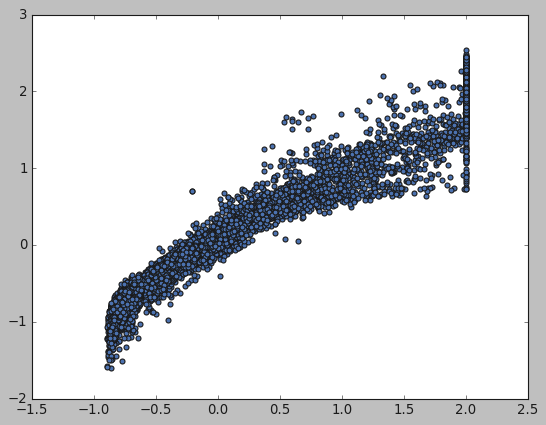

In [315]:
plt.scatter(y_test['price'], y_pred)

In [316]:
# ITERATION 2

In [317]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept       -0.772383
carat            1.083577
table           -0.011259
x               -0.366020
y                0.284279
z               -0.039584
cut_Good         0.093944
cut_Ideal        0.159768
cut_Premium      0.153890
cut_Very_Good    0.127321
color_E         -0.048368
color_F         -0.067239
color_G         -0.105028
color_H         -0.210029
color_I         -0.329407
color_J         -0.476145
clarity_IF       1.009083
clarity_SI1      0.648713
clarity_SI2      0.446566
clarity_VS1      0.850920
clarity_VS2      0.783181
clarity_VVS1     0.959537
clarity_VVS2     0.951124
dtype: float64

In [318]:
#Inferential statistics
print(lm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.363e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:36:23   Log-Likelihood:                 2656.0
No. Observations:               18876   AIC:                            -5266.
Df Residuals:                   18853   BIC:                            -5086.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7724      0.016    -47.359

To ideally bring down the values to lower levels we can drop one of the variable that is highly correlated.

Dropping variables would bring down the multi collinearity level down.

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

We had a business problem to predict the price of the stone and provide insights for the company on the profits on different prize slots. From the EDA analysis we could understand the cut, ideal cut had number profits to the company. The colours H, I, J have bought profits fot the company. In clarity if we could see there were no flawless stones and they were no profits coming from I1, I2, I3 stones. The ideal, premium and very good types of cut were bringing profits where as fair and good are not bringing profits.

Using stats model if we could run the model again we can have P values and coefficients which will give us better understanding of the relationship, so that values more 0.05 we can drop those variables and re run the model again for better results.

Recommendations
     
1. The ideal, premium, very good cut types are the one which are bringing profits so that we could use marketing for these to bring in more profits.
     
2. The clarity of the diamond is the next important attributes the more the clear is the stone the profits are more.
        

The five best attributes are

Carat,

Y the diameter of the stone

clarity_IF

clarity_SI1

clarity_SI2

clarity_VS1

clarity_VS2

clarity_VVS1

clarity_VVS2

# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [320]:
### Loading nesscessary library for the model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [3]:
Holiday = pd.read_csv(r'C:\Users\vicky\Document\Holiday_Package.csv')

In [4]:
Holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [324]:
Holiday.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [325]:
# Checking the Shape of the data
Holiday.shape

(872, 8)

In [326]:
# Checking the info of the data
Holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


From above data, there is no null value in the dataset,

We have integer and object data

In [328]:
# Checking the describe of the data
Holiday.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have integer and continuous data,

Holiday package is our target variable

Salary, age , educ and number young children, number older children of employee have the went to foreign, these are the attributes we have to cross examine and help the company predict weather the person will opt for holiday package or not. 

In [329]:
# Checking the null value
Holiday.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [330]:
# Checking the duplicates in data
dups = Holiday.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [331]:
# unique values for categorical variables
for column in Holiday.columns:
    if Holiday[column].dtype == 'object':
        print(column.upper(),': ',Holiday[column].nunique())
        print(Holiday[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [332]:
# Percentage of target
Holiday.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

This split indicates that 45% of employees are interested in the holiday package.

# Univariate Analysis

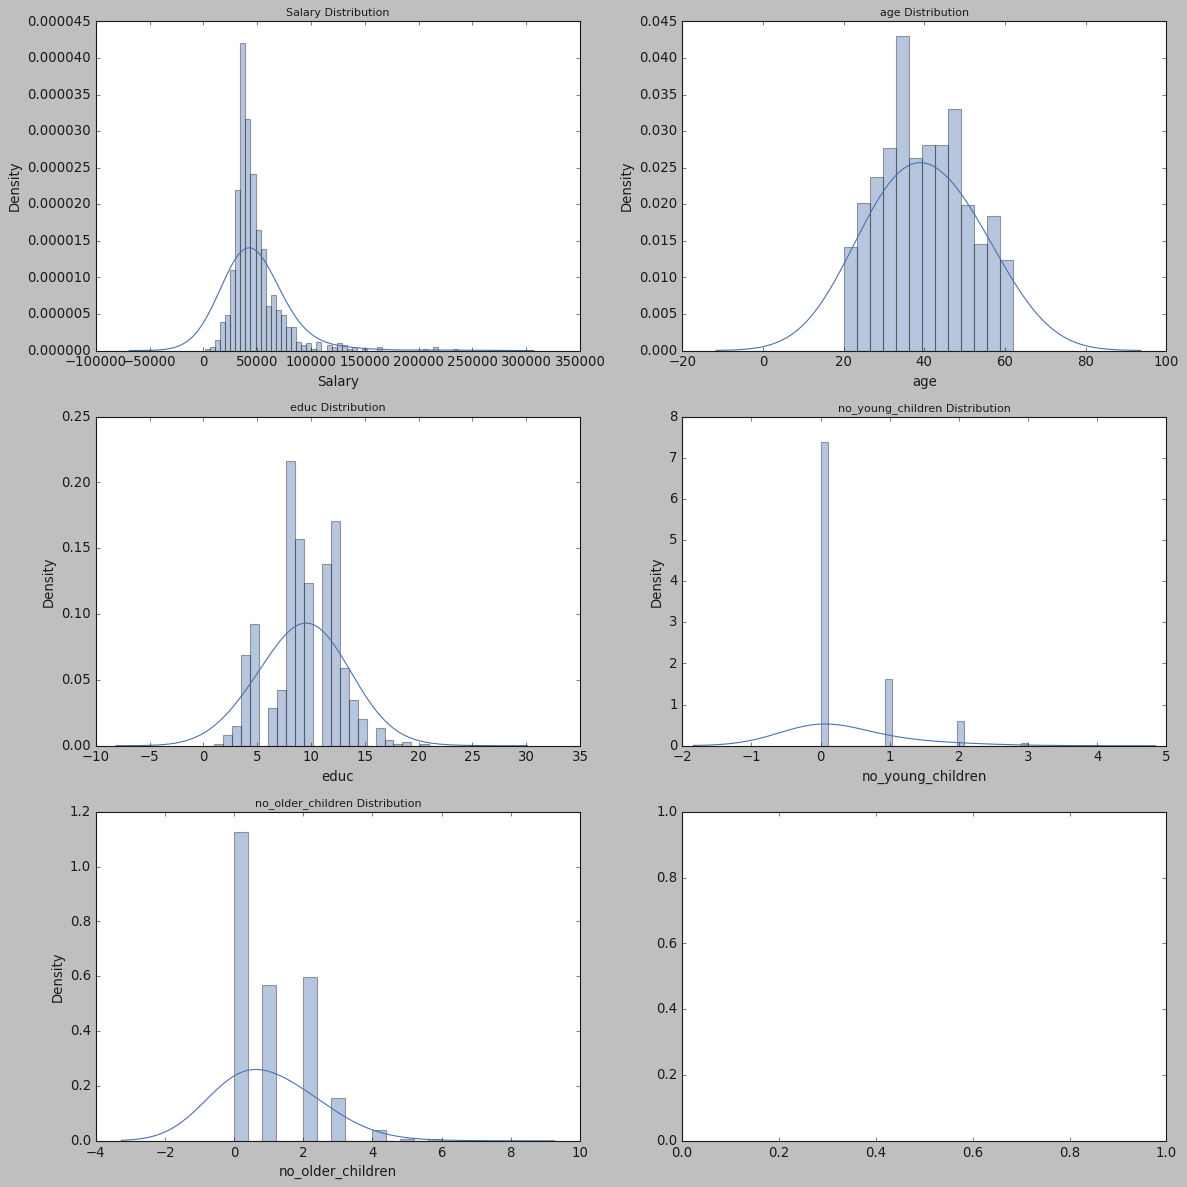

In [355]:
# Distplot to check Distribution and Density of each Variables
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)

a = sns.distplot(Holiday['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.distplot(Holiday['age'], kde_kws = {'bw' : 1}, ax=axes[0][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(Holiday['educ'],  kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(Holiday['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[1][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(Holiday['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("no_older_children Distribution",fontsize=10)

plt.tight_layout()
plt.show()

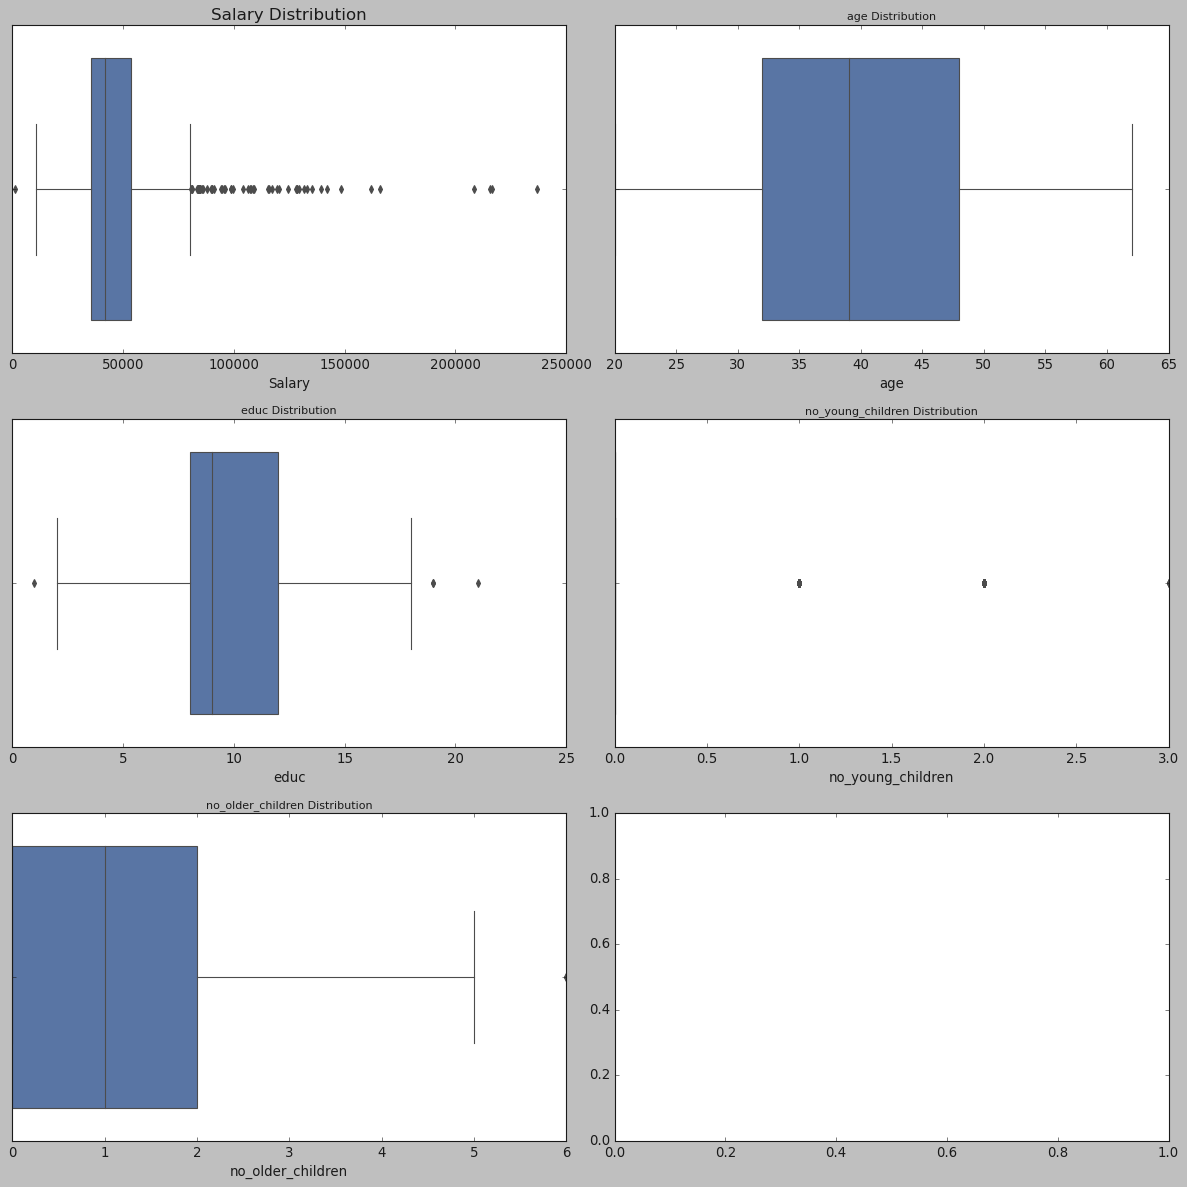

In [356]:
# Boxplot for checking presence of outliers in each feature or Univariate Analysis of all variables
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)

a = sns.boxplot(Holiday['Salary'] , orient = "v" , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=15)

a = sns.boxplot(Holiday['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(Holiday['educ'] , orient = "v" , ax=axes[1][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(Holiday['no_young_children'] , orient = "v" , ax=axes[1][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(Holiday['no_older_children'] , orient = "v" , ax=axes[2][0])
a.set_title("no_older_children Distribution",fontsize=10)

plt.tight_layout()
plt.show()

In [357]:
Holiday.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [358]:
Holiday.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

# Categorical Variables

<AxesSubplot:xlabel='foreign', ylabel='count'>

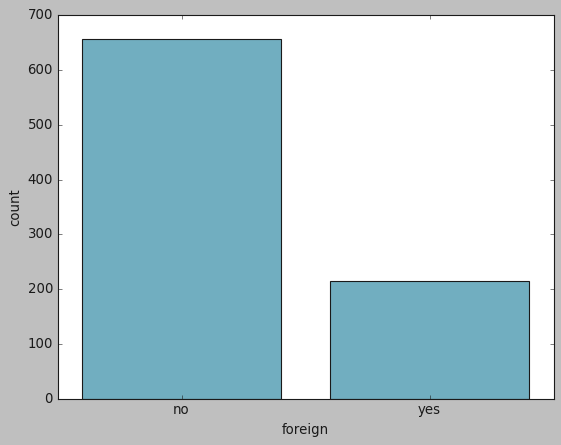

In [359]:
# Ckecking the foreign with count
sns.countplot(x="foreign", data=Holiday, color="c")

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

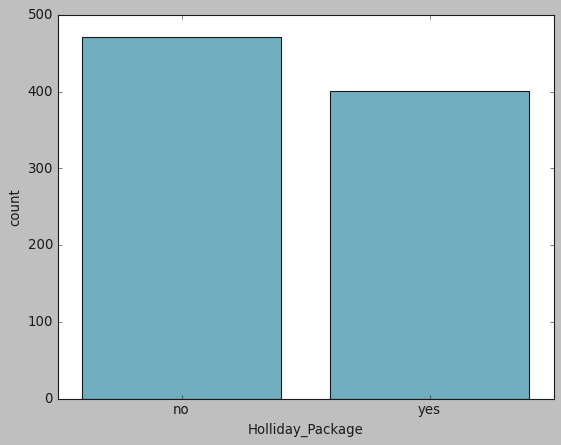

In [360]:
# Checking the Holliday_Package with Count
sns.countplot(x="Holliday_Package", data=Holiday, color="c")

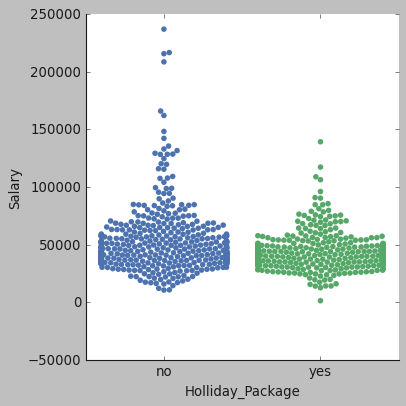

In [361]:
# Checking the Holliday_Package with Salary
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=Holiday)

We can see employee below salary 150000 have always opted for holiday package

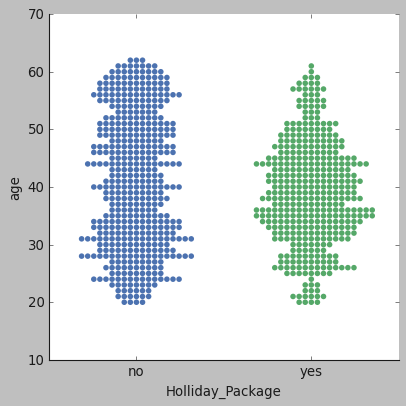

In [362]:
# Checking the Holliday_Package with age
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=Holiday)

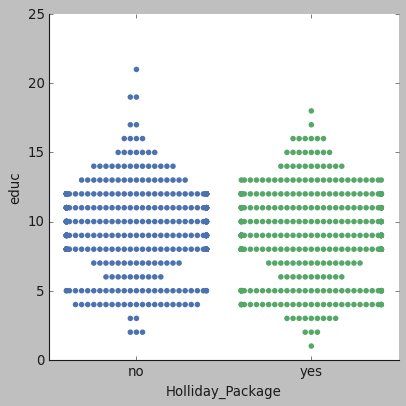

In [363]:
# Checking the Holliday_Package with educ
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=Holiday)

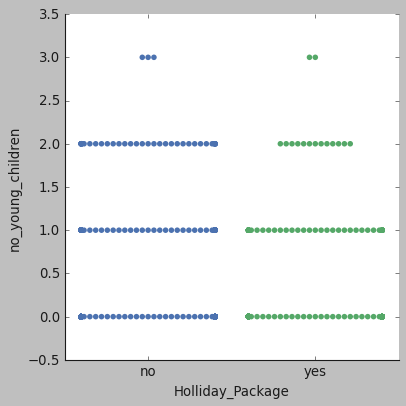

In [364]:
# Checking the Holliday_Package with no_young_children
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=Holiday)

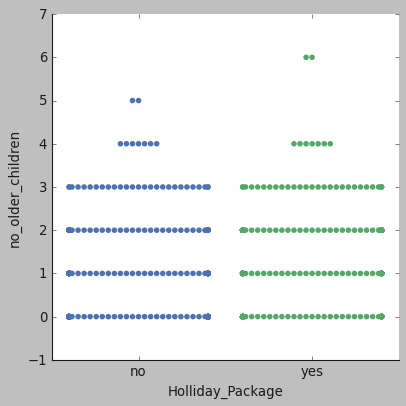

In [365]:
# Checking the Holliday_Package with no_older_children
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=Holiday)

<AxesSubplot:xlabel='age', ylabel='Salary'>

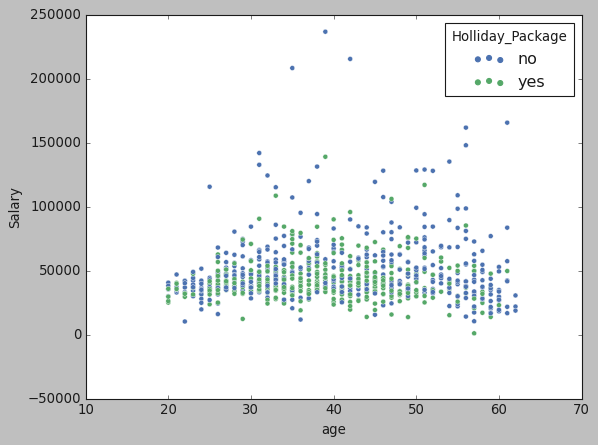

In [366]:
# Checking the scatter-plot between Salary and age
sns.scatterplot(data = Holiday, x='age',y='Salary', hue = 'Holliday_Package')

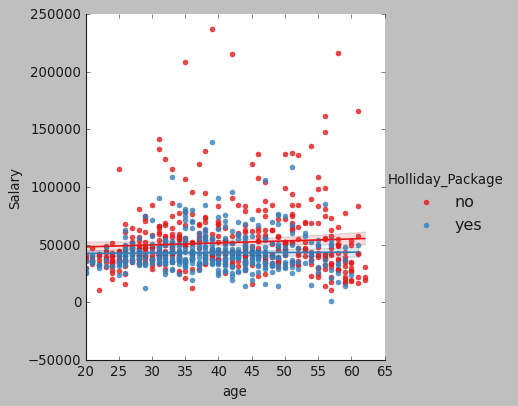

In [367]:
# Checking the lmplot between Salary and age
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=Holiday,
               palette="Set1")

Employee age over 50 to 60 have seems to be not taking the holiday package, whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package.

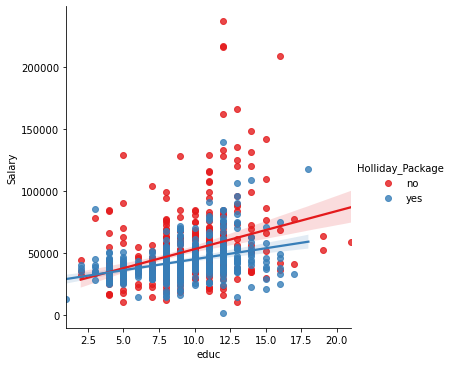

In [6]:
# Checking the lmplot between Salary and educ
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=Holiday,
               palette="Set1")

<AxesSubplot:xlabel='educ', ylabel='Salary'>

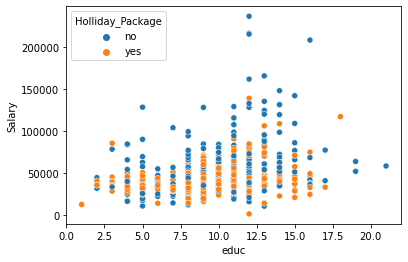

In [8]:
# Checking the scatterplot between Salary and educ
sns.scatterplot(data = Holiday, x='educ',y='Salary', hue = 'Holliday_Package')

<AxesSubplot:xlabel='no_young_children', ylabel='age'>

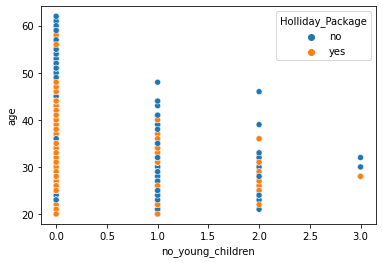

In [9]:
# Checking the scatterplot between age and no_young_children
sns.scatterplot(data = Holiday, x='no_young_children',y='age', hue = 'Holliday_Package')

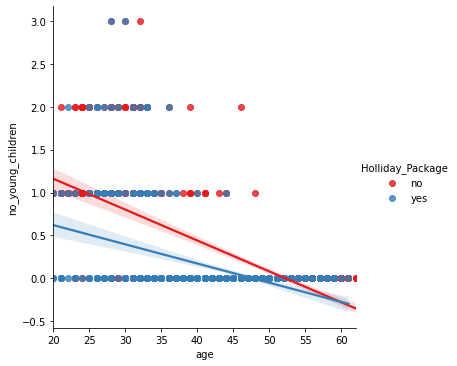

In [10]:
# Checking the lmplot between age and no_young_children
sns.lmplot(x="age", y="no_young_children", hue="Holliday_Package", data=Holiday,
               palette="Set1")

<AxesSubplot:xlabel='no_older_children', ylabel='age'>

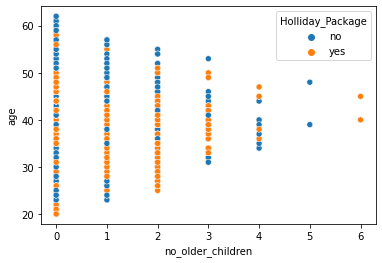

In [11]:
# Checking the scatterplot between age and no_older_children
sns.scatterplot(data = Holiday, x='no_older_children',y='age', hue = 'Holliday_Package')

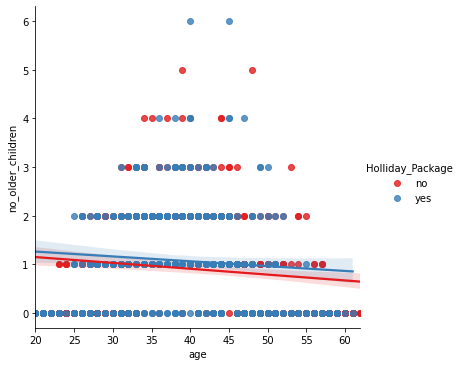

In [12]:
# Checking the lmplot between age and no_older_children
sns.lmplot(x="age", y="no_older_children", hue="Holliday_Package", data=Holiday,
               palette="Set1")

# Bivariate Analysis

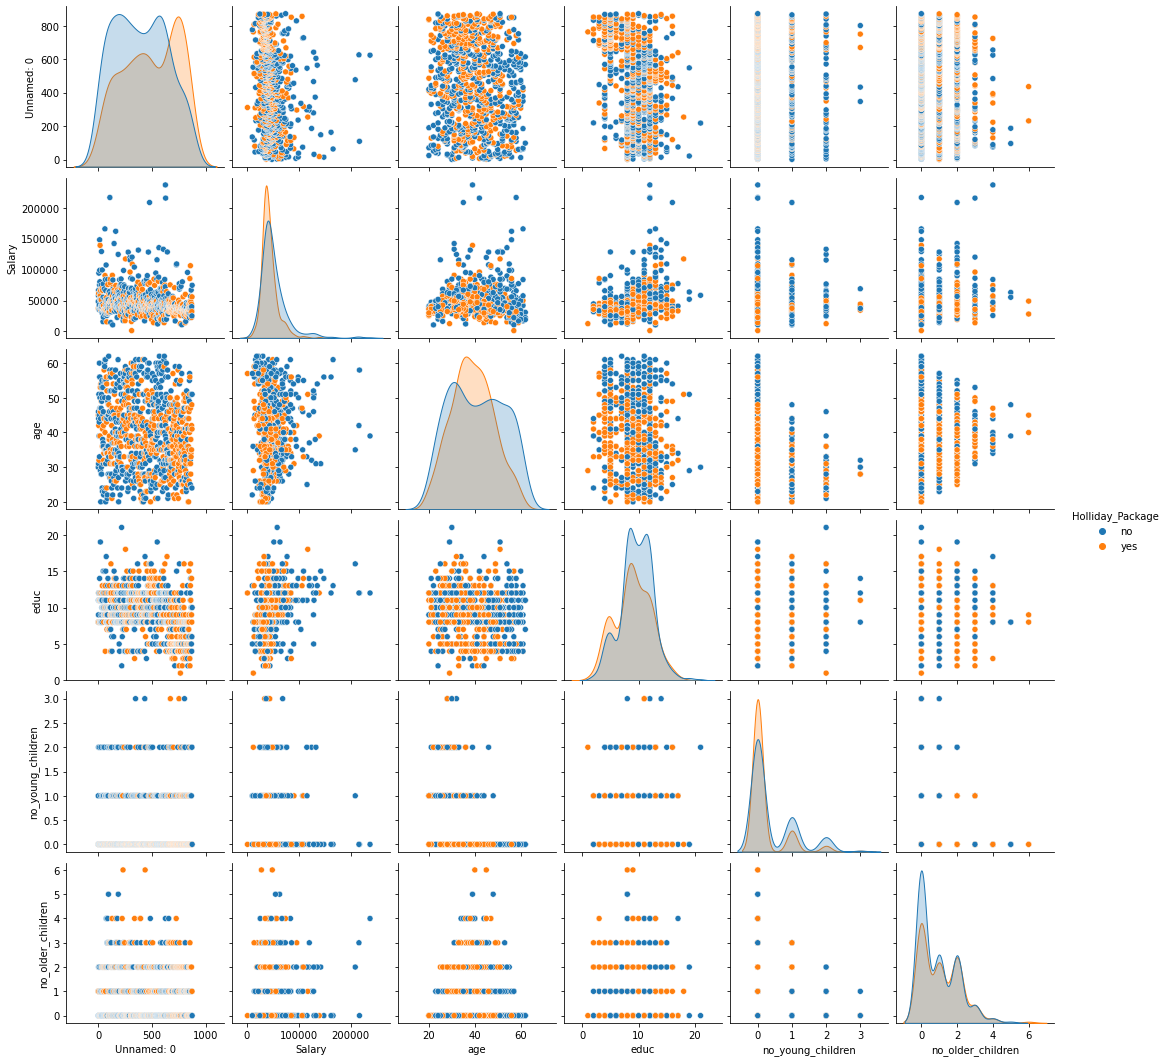

In [13]:
# Checking Data Distribution
sns.pairplot(Holiday ,diag_kind='kde' ,hue='Holliday_Package');

There is no correlation between the data, the data seems to be normal. There is no huge difference in the data distribution among the holiday package, I don't see any clear two different distribution in the data.

<AxesSubplot:>

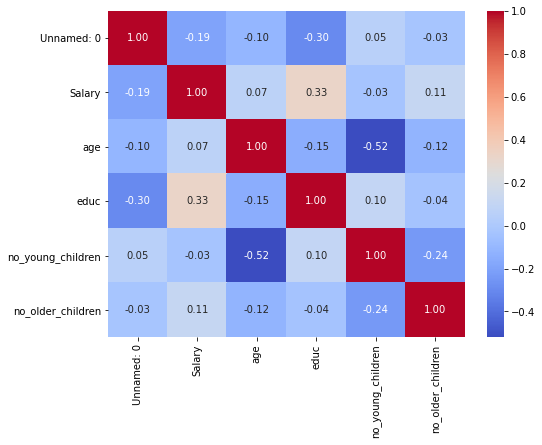

In [14]:
# checking for Correlations
Holiday_cor = Holiday.corr()
plt.figure(figsize=(8,6))
sns.heatmap(Holiday_cor, annot=True, fmt = '.2f', cmap='coolwarm')

No multi collinearity in the data

# Treating Outliers

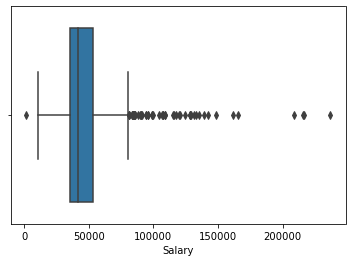

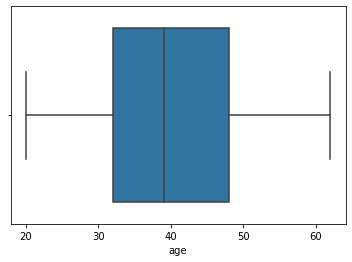

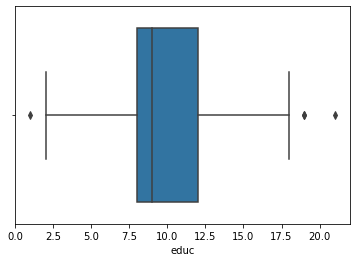

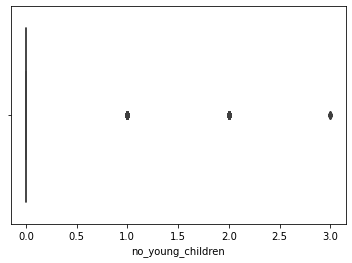

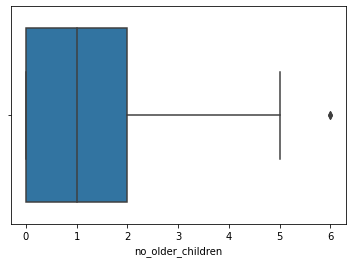

In [15]:
# Before Outliers Treatment
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(Holiday[i])
    plt.show()

We have outliers in the dataset, as LDA works based on numerical computation treating outliers will help perform the model better.

In [16]:
# After Outlier Treatment
cont=Holiday.dtypes[(Holiday.dtypes!='uint8') & (Holiday.dtypes!='object')].index

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in Holiday[cont].columns:
    lr,ur=remove_outlier(Holiday[column])
    Holiday[column]=np.where(Holiday[column]>ur,ur,Holiday[column])
    Holiday[column]=np.where(Holiday[column]<lr,lr,Holiday[column])

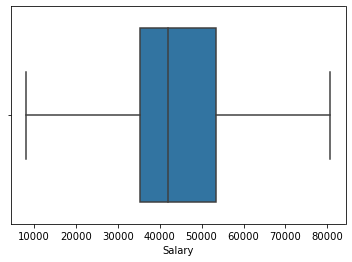

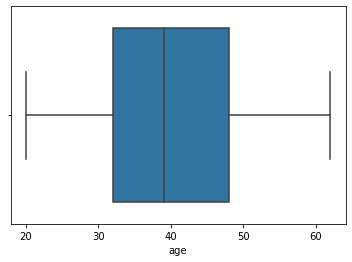

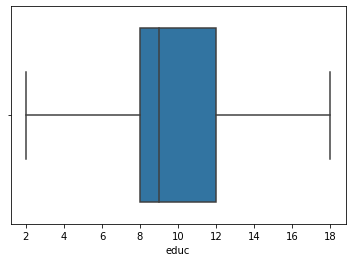

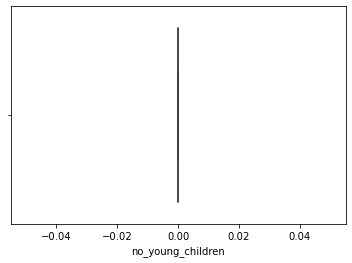

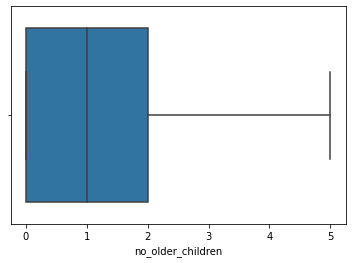

In [19]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(Holiday[i])
    plt.show()

No outliers in the data, all outliers have been treated.

In [6]:
Holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [7]:
# drop the id column as it is useless for the model
Holiday1 = Holiday.drop(columns=['Unnamed: 0'], axis=1)

In [8]:
Holiday1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [9]:
Holiday2 = Holiday1.copy()

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [10]:
# Converting categorical to dummy variables in data
data = pd.get_dummies(Holiday2, columns=['Holliday_Package','foreign'], drop_first = True)

In [11]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


The encoding helps the logistic regression model predict better results

# Train/ Test split

In [12]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [13]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [14]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

# Grid Search Method:

The grid search method is used for logistic regression to find the optimal solving and the parameters for solving

In [15]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [16]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [17]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [18]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [19]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [20]:
best_model = grid_search.best_estimator_

The grid search method gives, liblinear solver which is suitable for small datasets.

Tolerance and penalty has been found using grid search method

Predicting the training data,

In [21]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [22]:
ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [23]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677008,0.322992
1,0.566054,0.433946
2,0.688600,0.311400
3,0.517284,0.482716
4,0.545703,0.454297


# LDA MODEL

In [24]:
# Checking the head of the data
Holiday1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [25]:
# Checking the shape of the data
Holiday1.shape

(872, 7)

In [26]:
# Checking the info of the data
Holiday1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [27]:
# unique values for categorical variables
for feature in Holiday1.columns: 
    if Holiday1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Holiday1[feature].unique()))
        print(pd.Categorical(Holiday1[feature].unique()).codes)
        Holiday1[feature] = pd.Categorical(Holiday1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


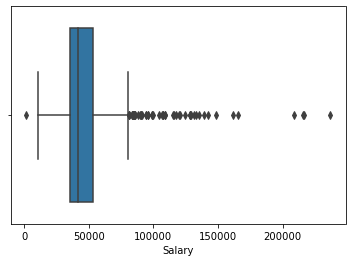

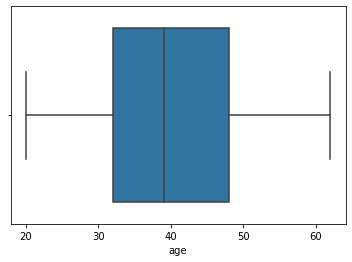

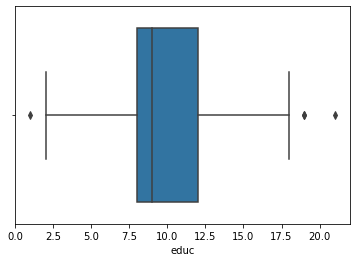

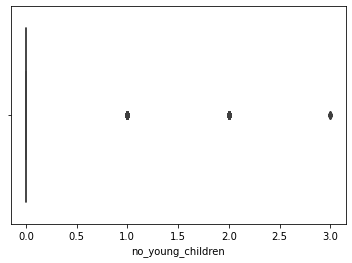

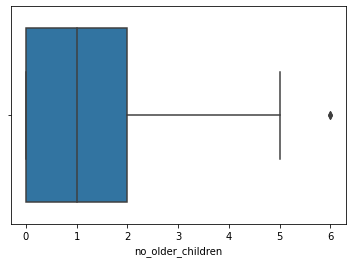

In [28]:
# Boxplot for checking presence of outliers in each feature or Univariate Analysis of all variables
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(Holiday1[i])
    plt.show()

In [29]:
# Checking the head of the data
Holiday1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [30]:
# Checking the info of the data
Holiday1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [31]:
X = Holiday1.drop('Holliday_Package',axis=1)
Y = Holiday1.pop('Holliday_Package')

In [32]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [33]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [34]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [35]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



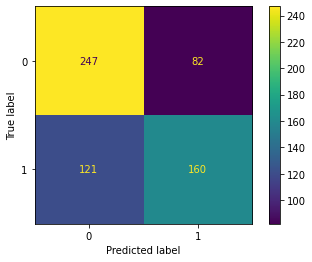

In [38]:
# Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



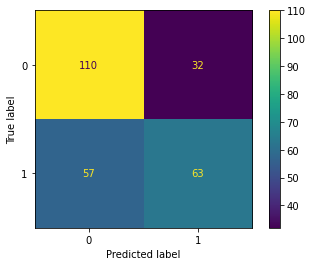

In [62]:
# Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [63]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6672131147540984

In [64]:
# AUC and ROC for the training data

AUC: 0.735


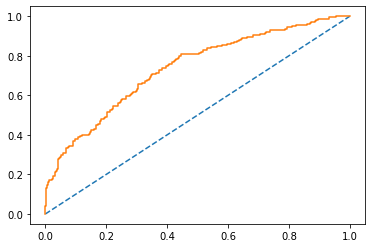

In [65]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [66]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6603053435114504

In [67]:
# AUC and ROC for the test data

AUC: 0.719


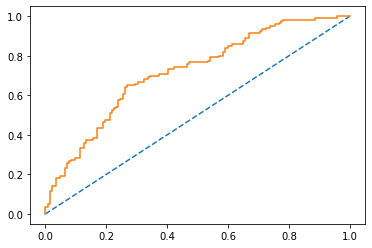

In [68]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [69]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.57
lr_train_f1  0.61


In [70]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.66
lr_test_recall  0.52
lr_test_f1  0.59


# LDA MODEL

In [59]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [60]:
# Accuracy - Train Data
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6639344262295082

In [48]:
# Checking the classification report of the train data
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [49]:
# Confusion matrix on the train data
confusion_matrix(Y_train, pred_class_train)

array([[243,  86],
       [119, 162]], dtype=int64)

In [50]:
# Accuracy - Test Data
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6412213740458015

In [71]:
# Checking the classification report of the test data
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



In [72]:
# Confusion matrix on the test data
confusion_matrix(Y_test, pred_class_test)

array([[109,  33],
       [ 61,  59]], dtype=int64)

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


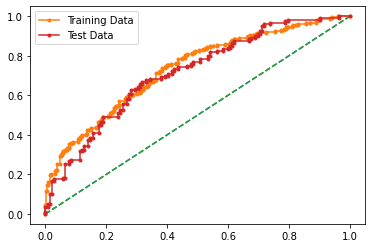

In [74]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [75]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61


In [76]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


In [77]:
# Compare Both the models 
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.66,0.66,0.64
AUC,0.73,0.72,0.73,0.71
Recall,0.57,0.52,0.58,0.49
Precision,0.66,0.66,0.65,0.64
F1 Score,0.61,0.59,0.61,0.56


# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

We had a business problem where we need predict whether an employee would opt for a holiday package or not, for this problem we had done predictions both logistic regression and linear discriminant analysis. Since both are results are same.

The EDA analysis clearly indicates certain criteria where we could find people aged above 50 are not interested much in holiday packages. 
So this is one of the we find aged people not opting for holiday packages.

People ranging from the age 30 to 50 generally opt for holiday packages.

Employee age over 50 to 60 have seems to be not taking the holiday package, 

Whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package.

The important factors deciding the predictions are salary, age and educ.

Recommendations

1. To improve holiday packages over the age above 50 we can provide religious destination places.

2. For people earning more than 150000 we can provide vacation holiday packages.

3. For employee having more than number of older children we can provide packages in holiday vacation places.
